In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/drive/MyDrive/logistic_data

mkdir: cannot create directory ‘/content/drive/MyDrive/logistic_data’: File exists


In [ ]:
%cd /content/drive/MyDrive/logistic_data #%cd logistic_data/ #changing_directory

[Errno 2] No such file or directory: '/content/drive/MyDrive/logistic_data #%cd logistic_data/ #changing_directory'
/content


In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


In [ ]:
train_path = '/content/drive/MyDrive/logistic_data/emnist-letters-train.csv'
test_path ='/content/drive/MyDrive/logistic_data/emnist-letters-test.csv' 
train = pd.read_csv(train_path)
train = train.iloc[0:4000, :]
print(train)


      23  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.406  0.407  0.408  \
0      7  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
1     16  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
2     15  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
3     23  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
4     17  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
...   .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
3995  17  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
3996  11  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
3997  23  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
3998  10  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
3999  12  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   

      0.409  0.410  0.411  

In [ ]:
train_X = train.iloc[:,1:]
u = np.ones([np.shape(train_X)[0], 1])
train_X = np.concatenate((u, train_X), axis = 1)
print(np.shape(train_X))

(4000, 785)


In [ ]:
train_Y = train.iloc[:,0]
ynew = np.zeros([np.size(train_Y),len(set(train_Y))])
for i in range(0,np.size(train_Y)):
   for j in range(1, len(set(train_Y))+1):
     if train_Y[i] == j:
       ynew[i, j-1] = 1
print(ynew)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
def grad(X, Y, learningrate, itrn):
  m = np.shape(X)[0] # training set length

  theta = np.zeros( (X.shape[1] , 26) ) # initializing theta
  
  cost_all = [] # to store cost Function

  for z in range(itrn): 

      x = np.dot(X, theta) # hypothesis

      yprobability = sigmoid(x)

      cost = (1/m)*np.sum((-Y*np.log(yprobability)) - ((1-Y)*np.log(1-yprobability))) # Cost Function

      dif = (1/m)* np.dot(X.T, yprobability - Y) # differentiating Cost Function w.r.t Theta

      theta = theta - learningrate*dif # updating theta

      cost_all.append(cost) # updating cost Function list


      # to see if cost is decreasing

      if z % 100 == 0:
        print("Cost is", cost)

  return yprobability , cost_all

In [ ]:
itrn = 2000
learningrate = 0.00001

In [ ]:
yprobability , cost_all = grad(Y= ynew, X=train_X , learningrate=learningrate, itrn = itrn)

Cost is 18.02182669455858
Cost is 2.159900962099091
Cost is 1.996034770872388
Cost is 1.9083628451575714
Cost is 1.8476980452486997
Cost is 1.8008588299544186
Cost is 1.7624439108494
Cost is 1.7297181956732048
Cost is 1.7011052628502779
Cost is 1.6756127448489517
Cost is 1.6525745719822729
Cost is 1.6315213849477401
Cost is 1.6121096002455793
Cost is 1.5940798985692948
Cost is 1.5772315800498307
Cost is 1.5614060039010127
Cost is 1.5464754979667883
Cost is 1.5323357034146095
Cost is 1.5189001534266882
Cost is 1.5060963477180087


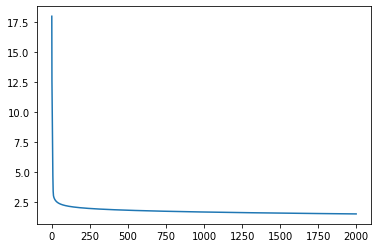

In [ ]:
plt.plot(np.arange(itrn), cost_all)

In [ ]:
print((yprobability))

[[6.69174837e-03 3.35528285e-06 6.10324729e-06 ... 5.14471893e-08
  9.42516382e-10 7.32014594e-10]
 [1.22927271e-04 7.87156692e-02 7.41789715e-05 ... 5.00220269e-06
  7.36175306e-05 8.03428026e-02]
 [3.05662277e-03 1.80162216e-05 3.61061659e-02 ... 2.78047934e-07
  3.26693217e-11 3.17841568e-03]
 ...
 [1.40960017e-05 2.23168015e-03 1.76486847e-04 ... 1.71119256e-03
  2.45570754e-09 8.69973568e-04]
 [7.22059854e-05 4.51380495e-06 2.89943677e-03 ... 6.20438704e-05
  1.29370002e-04 3.11271468e-03]
 [2.76852736e-04 2.18695530e-02 1.82112790e-03 ... 9.06200006e-05
  3.46859717e-05 1.17847518e-01]]


In [ ]:
for i in range(np.shape(yprobability)[0]):
  for j in range(np.shape(yprobability)[1]):
    if yprobability[i][j] < 0.5:
      yprobability[i][j] = False
    else:
      yprobability[i][j] = True
yprobability

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test = pd.read_csv(test_path)
test = test.iloc[1:4000, :]
test

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
